In [68]:
import os
import torch
from torchvision.transforms import Resize
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [153]:
IMG_SHAPE = (320, 320)
query_batch_ind = 0
query_x = 40
query_y = 40

train_data_root_dir = '/home/suo/data/CheXpert-v1.0/train'
attention_root_dir = '/home/suo/experiments/chexpert_cross_sectional_attention_fusion_unobserved_negative_4_realmask_test/predictions'
attention_fn = 'attention_2759'
attention_file_path = os.path.join(attention_root_dir, attention_fn)

In [154]:
save_dict = torch.load(attention_file_path)

# Load Images

In [155]:
patient = save_dict['patient'][query_batch_ind]
study = save_dict['study_id'][query_batch_ind]
img_path = os.path.join(train_data_root_dir, patient, study)

frontal = os.path.join(img_path, 'view1_frontal.jpg')
lateral = os.path.join(img_path, 'view2_lateral.jpg')

In [156]:
resize = Resize(IMG_SHAPE)

frontal = Image.open(frontal)
frontal = resize(frontal)

lateral = Image.open(lateral)
lateral = resize(lateral)

frontal_np = np.array(frontal)
lateral_np = np.array(lateral)

# Load Attention Mask

In [158]:
frontal_mask = save_dict['frontal_mask']
lateral_mask = save_dict['lateral_mask']

B, C, H, W, D = frontal_mask.shape
print(frontal_mask.shape)

row_mask = frontal_mask[query_batch_ind, 0, query_x, query_y].cpu().numpy()
print(row_mask)

torch.Size([8, 1, 80, 80, 80])
[ 0.00044464  0.00075736  0.00079546  0.00085961  0.00120963  0.00134702
  0.00160769  0.00213283  0.00345384  0.0091995   0.0098786   0.01118803
  0.0065949   0.00347275  0.00320951  0.0052317   0.00727762  0.00822313
  0.01002912  0.0127174   0.01474158  0.01460247  0.01066615  0.00441387
  0.00240747  0.00405652  0.01292186  0.01812281  0.02128314  0.02063304
  0.01902073  0.01432621  0.01456436  0.01624835  0.01493757  0.01436265
  0.02129992  0.03045623  0.04309276  0.04305916  0.03229979  0.03767568
  0.04569339  0.04863441  0.04245698  0.02273028  0.00702486  0.0042421
  0.00480181  0.00361826  0.00369049  0.00164914  0.0071595   0.01240379
  0.00772232  0.00406779  0.00356083  0.00518621  0.00622257  0.00755684
  0.00971913  0.0115864   0.008919    0.00635399  0.00807383  0.00931974
  0.00726899  0.00936446  0.01206942  0.01691165  0.0253094   0.03185311
  0.03786455  0.01514067  0.00982998  0.00435731  0.00112817  0.00087523
  0.0033044   0.00750

# Match Image and attention Mask

In [159]:
a = int(query_x / float(W) * frontal_np.shape[0])
b = int((query_x + 1) / float(W) * frontal_np.shape[0])
c = int(query_y / float(W) * frontal_np.shape[1])
d = int((query_y + 1) / float(W) * frontal_np.shape[1])

In [160]:
frontal_np[a:b, c:d] = 255

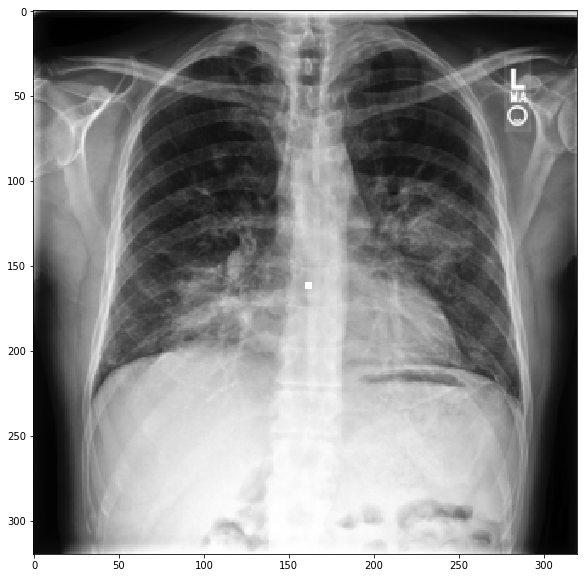

In [161]:
plt.figure(figsize=(10, 10))
plt.imshow(frontal_np, cmap='gray')
plt.show()

In [162]:
mask = np.repeat(row_mask, IMG_SHAPE[0] / W) 
mask = mask / mask.max() * 255
lateral_np[a:b] = mask

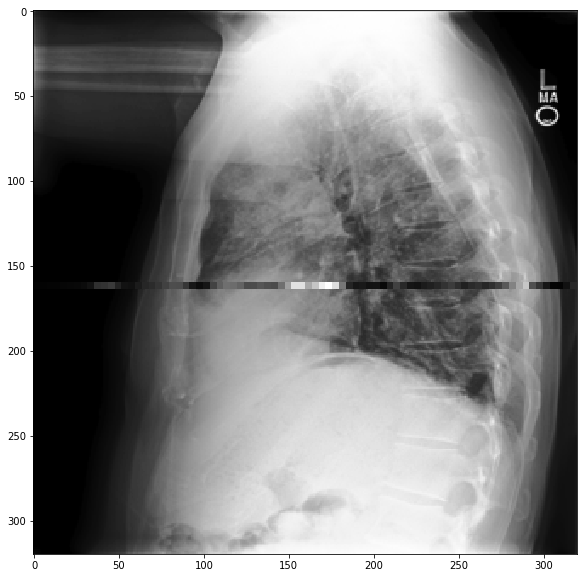

In [164]:
plt.figure(figsize=(10, 10))
plt.imshow(lateral_np, cmap='gray')
plt.show()